
# ***`Hello, my name is EYA ABID. I'm an intern @ The Sparks Foundation, and this is my attempt completing the 7th task (advanced level) from the task list.`***

---



# ***`The main mission is to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.`***

---



***1st, to install the necessary Dataset, we need to install "yfinance", which is a python library that offers a reliable, threaded, and Pythonic way to download historical market data from Yahoo! finance. (for more details: https://pypi.org/project/yfinance/)***

---

In [2]:
pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3MB 5.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=5860d002ddb64b5c2b9da1a4dbc44098cb3b5ebc80b283c2a195321995d08c82
  Stored in directory: /tmp/pip-ephem-wheel-cache-w5xbr5fa/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


***Now, we ensure that we have our needed libraries such as pandas, numpy, warnings, matplotlib, "altair" (which is a declarative statistical visualization library for Python, more @ https://altair-viz.github.io), sikit-learn, and the "statsmodels" api (which is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration, more @ https://www.statsmodels.org/stable/index.html)***

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

import altair as alt
 

from sklearn.metrics import mean_squared_error
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#here we are ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

***Now, we import our Dataset. We will pick a start and an end date, because the textual data itself is limited to a specific timeframe. We will keep the last day for the prediction output. Then, we will rename the columns into lower case format***

In [5]:
import yfinance as yf
bse_data = yf.download('^BSESN', start='2015-01-01', end='2020-06-30')
unseenbse_data = yf.download('^BSESN', start='2020-06-30', end='2020-07-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
bse_data.columns
unseenbse_data.columns
bse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)
unseenbse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)
bse_data.info()
unseenbse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1345 entries, 2015-01-02 to 2020-06-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1345 non-null   float64
 1   high      1345 non-null   float64
 2   low       1345 non-null   float64
 3   close     1345 non-null   float64
 4   adjclose  1345 non-null   float64
 5   volume    1345 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 73.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2020-06-30 to 2020-06-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1 non-null      float64
 1   high      1 non-null      float64
 2   low       1 non-null      float64
 3   close     1 non-null      float64
 4   adjclose  1 non-null      float64
 5   volume    1 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 56.0 bytes


***We inspect the first and the last rows from the training and testing dataset, and from the prediction dataset (last days)***

In [7]:
bse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [8]:
bse_data.tail()

,open,high,low,close,adjclose,volume
Date,,,,,,
2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200
2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600
2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600
2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800
2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300


In [12]:
unseenbse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500


***We notice that the Date column is not considered a column name in this Dataset, so we fix this by resetting the indexes and renaming the column***

In [9]:
bse_data.reset_index(inplace=True)
bse_data.rename(columns={'Date': 'date'}, inplace = True)
bse_data.head()

,date,open,high,low,close,adjclose,volume
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [10]:
unseenbse_data.reset_index(inplace=True)
unseenbse_data.rename(columns={'Date': 'date'}, inplace = True)
unseenbse_data.head()

,date,open,high,low,close,adjclose,volume
0,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500


***Now that every column is well indexed and formatted, we are going to reform the date***

In [11]:
bse_data['date'] = pd.to_datetime(bse_data['date'], format = '%Y%m%d')
unseenbse_data['date'] = pd.to_datetime(unseenbse_data['date'], format = '%Y%m%d')

***Now, let's calculate the actual price in the prediction dataset***

In [12]:
unseenbsedata_price = (unseenbse_data['high'] + unseenbse_data['low'] + unseenbse_data['close'])/ 3
unseenbsedata_price

0    34987.503906
dtype: float64

***We are using Rolling window analysis of time series by creating week moving average of closing price of BSE index.*** 

In [13]:
def stock_weekmovingavg(wks, df):
  dateclose_data = pd.DataFrame({'date': df['date'], 'close':df['close']})
  dateclose_data.set_index('date', inplace=True)
  num = wks * 5 
  #calculating the number of days in the week. 5 days because BSE is open for 5 days / week
  dateclose_data['movingavg'] = dateclose_data['close'].rolling(window=num).mean().shift()
  return dateclose_data.dropna()

***We choose the number of weeks as 4 and we do the visualisation job***

In [14]:
stock_weekmovingavg(4, bse_data).head()

,close,movingavg
date,,
2015-02-02,29122.269531,28256.509570
2015-02-03,29000.140625,28318.228027
2015-02-04,28883.109375,28376.119043
2015-02-05,28850.970703,28470.901465
2015-02-06,28717.910156,28568.008984


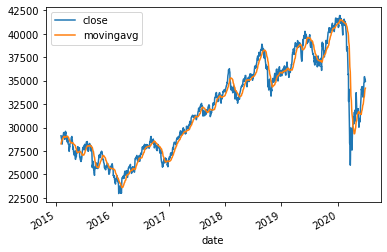

In [15]:
stock_weekmovingavg(4, bse_data).plot()

In [16]:
altdata_fourweek = stock_weekmovingavg(4, bse_data)
altdata_fourweek.reset_index(inplace=True)
altdata_fourweek.rename(columns={list(altdata_fourweek)[0]:'date'}, inplace=True)
alt.Chart(altdata_fourweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

***We opt for the partial autocorrelation process now***

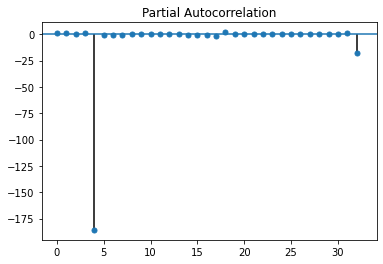

In [17]:
plotfourweek = altdata_fourweek.filter(['date', 'movingavg'], axis=1) #df.copy()
plotfourweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_fourweek['date']))) 
del plotfourweek['date']
sm.graphics.tsa.plot_pacf(plotfourweek.values.squeeze())
plt.show()

***In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 4 and 32. Since it is less than 0 and more than -1 so 4 and 32 represents a perfect negative correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions (which is not vividly seen in the above plot)***

***Now we will be creating the dummy time series***

In [18]:
def boolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data['percentchg'] = (data[col].pct_change()) * 100  #percentage change compare to previous volume using pct_change() function
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(col, axis = 1, inplace = True)
  return data.dropna()

In [19]:
boolean_shock(10, bse_data, 'volume')

,percentchg,shock
date,,
2015-01-05,24.324324,1
2015-01-06,53.260870,1
2015-01-07,-13.475177,0
2015-01-08,-32.786885,0
2015-01-09,35.365854,1
...,...,...
2020-06-23,0.398406,0
2020-06-24,5.555556,0
2020-06-25,-7.518797,0


In [20]:
altdata_volpercentchg = boolean_shock(10, bse_data, 'volume')
altdata_volpercentchg.reset_index(inplace=True)
altdata_volpercentchg.rename(columns={list(altdata_volpercentchg)[0]:'date'}, inplace=True)
alt.Chart(altdata_volpercentchg).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

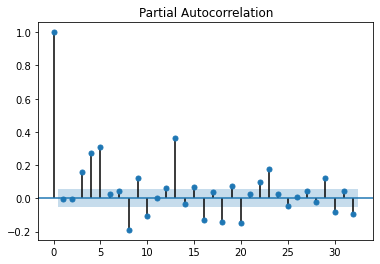

In [21]:
plotvolpercentchg = altdata_volpercentchg.filter(['date', 'percentchg'], axis=1) #df.copy()
plotvolpercentchg.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_volpercentchg['date']))) 
del plotvolpercentchg['date']
sm.graphics.tsa.plot_pacf(plotvolpercentchg.values.squeeze())
plt.show()

***We can notice that in the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 3, 4, 5, 8, 9. 10, 12, 13, 15, 16, 18, 19, 20, 22, 23, 29, 30, 32. And lag value 0 represents a perfect positive correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions***

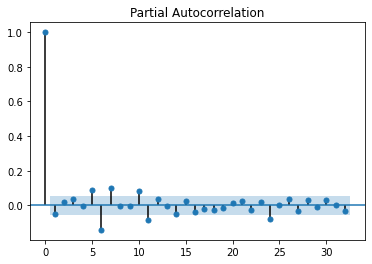

In [22]:
boolean_shock(10, bse_data, 'close')
altdata_closepercentchg10 = boolean_shock(10, bse_data, 'close')
altdata_closepercentchg10.reset_index(inplace=True)
altdata_closepercentchg10.rename(columns={list(altdata_closepercentchg10)[0]:'date'}, inplace=True)
alt.Chart(altdata_closepercentchg10).mark_point().encode(
    x='date',
    y='percentchg'
)
plotclosepercentchg10 = altdata_closepercentchg10.filter(['date', 'percentchg'], axis=1) #df.copy()
plotclosepercentchg10.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_closepercentchg10['date']))) 
del plotclosepercentchg10['date']
sm.graphics.tsa.plot_pacf(plotclosepercentchg10.values.squeeze())
plt.show()

***In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 5, 6, 7, 10, 11, 24. And lag value 0 represents a perfect positive correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions***

***Now, we will try pricing shock without volume shock***

In [23]:
def priceboolean_shock(percent, df):
  df['date'] = pd.to_datetime(df['date'])
  data = df.filter(['date', 'high', 'low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data['priceavg'] = (data['high'] + data['low'] + data['close']) / 3
  data['shock'] = (data['priceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
  return data

In [24]:
priceboolean_shock(10, bse_data)

,priceavg,shock
date,,
2015-01-02,27781.543620,0
2015-01-05,27897.886719,0
2015-01-06,27207.817057,0
2015-01-07,26912.179688,0
2015-01-08,27231.020182,0
...,...,...
2020-06-23,35252.093750,0
2020-06-24,35123.486979,0
2020-06-25,34807.830729,0


In [25]:
altdata_pricepercentchg = priceboolean_shock(10, bse_data)
altdata_pricepercentchg.reset_index(inplace=True)
altdata_pricepercentchg.rename(columns={list(altdata_pricepercentchg)[0]:'date'}, inplace=True)
alt.Chart(altdata_pricepercentchg).mark_point().encode(
    x='date',
    y='priceavg'
)

alt.Chart(...)

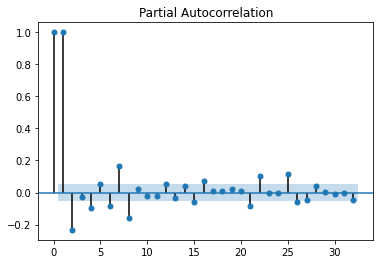

In [26]:
plotpricepercentchg = altdata_pricepercentchg.filter(['date', 'priceavg'], axis=1) #df.copy()
plotpricepercentchg.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_pricepercentchg['date']))) 
del plotpricepercentchg['date']
sm.graphics.tsa.plot_pacf(plotpricepercentchg.values.squeeze())
plt.show()

***Here, we can see that in the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 1, 2, 4, 6, 7, 8, 15, 16, 21, 22, 25, 26. And lag values 0, 1 represents a perfect positive correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions***

Now, we will be creating the reverse dummy time series:
Price shocks : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 2%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change() 

In [27]:
def reverseboolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['percentchg'] = (data[col].pct_change()) * 100
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x > percent else 0)
  data.drop(col, axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [28]:
reverseboolean_shock(2, bse_data, 'close')

,percentchg,shock
date,,
2015-01-02,0.163708,0
2015-01-05,3.167617,1
2015-01-06,0.292249,0
2015-01-07,-1.341501,0
2015-01-08,-0.668903,0
...,...,...
2020-06-22,-1.465151,0
2020-06-23,1.610168,0
2020-06-24,0.077145,0


In [29]:
altdata_closepercentchg = reverseboolean_shock(2, bse_data, 'close')
altdata_closepercentchg.reset_index(inplace=True)
altdata_closepercentchg.rename(columns={list(altdata_closepercentchg)[0]:'date'}, inplace=True)
alt.Chart(altdata_closepercentchg).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

In [30]:
def pricereverseboolean_shock(percent, df):
  data = df.filter(['date', 'high', 'low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['reversepriceavg'] = (data['high'] + data['low'] + data['close']) / 3
  data['shock'] = (data['reversepriceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [31]:
pricereverseboolean_shock(2, bse_data)

,reversepriceavg,shock
date,,
2015-01-02,27781.543620,0
2015-01-05,27897.886719,1
2015-01-06,27207.817057,0
2015-01-07,26912.179688,0
2015-01-08,27231.020182,0
...,...,...
2020-06-23,35252.093750,0
2020-06-24,35123.486979,0
2020-06-25,34807.830729,0


In [32]:
altdata_reversepricepercentchg = pricereverseboolean_shock(2, bse_data)
altdata_reversepricepercentchg.reset_index(inplace=True)
altdata_reversepricepercentchg.rename(columns={list(altdata_reversepricepercentchg)[0]:'date'}, inplace=True)
alt.Chart(altdata_reversepricepercentchg).mark_point().encode(
    x='date',
    y='reversepriceavg'
)

alt.Chart(...)

Now, let's begin our Textual Analysis of news from Times of India News Headlines.
Let's start by reading the uploaded csv file and assigning to news variable 

---


In [52]:
news  = pd.read_csv('/content/drive/MyDrive/india-news-headlines.csv')

In [53]:
#getting the overview of all the columns in the news dataset
news.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [54]:
#finding the total rows and columns of news dataset
news.shape

(3424067, 3)

In [55]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [37]:
#converting publish_date column to 
news['publish_date'] = pd.to_datetime(news['publish_date'], format = '%Y%m%d')

In [38]:
#getting brief overview of the dataset - number of columns and rows (shape of dataset), 
#columns names and its dtype, how many non-null values it has and memory usage.
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 78.4+ MB


In [39]:
#finding unique values in headline_category
news['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'elections.assembly-elections.bihar',
       'astrology.horoscope.monthly', 'astrology.numerology-tarot'],
      dtype=object)

In [40]:
#checking all the values count (unique values total count)
news['headline_category'].value_counts()

india                                   288541
unknown                                 209582
city.mumbai                             134428
city.delhi                              127717
business.india-business                 116761
                                         ...  
scorecard-and-statistics                     8
sports.tennis.top-stories.tennis-atp         8
profiles.india-profiles                      8
himachal-pradesh                             8
mahindra-cars                                8
Name: headline_category, Length: 1013, dtype: int64

In [41]:
#total unique values count
news['headline_category'].value_counts().count()

1013

In [42]:
#checking all the values count (unique values total count)
news['headline_text'].value_counts()

Straight Answers                                                              6723
Cartoons                                                                      1536
Straight answers                                                              1500
Photogallery                                                                  1353
Your say                                                                      1012
                                                                              ... 
Lead India: 'Why politics when I'd rather get a promotion?'                      1
Molest charge against 'BJP men' who attacked JU student; friend                  1
End to airport waterlogging woes?                                                1
Divya Drishti written update; July 20; 2019: Drishti and Divya save Simran       1
Partition museum to preserve a memory almost lost                                1
Name: headline_text, Length: 3168800, dtype: int64

In [43]:
#total unique values count
news['headline_text'].value_counts().count()

3168800

In [44]:
#finding if any null values are present
news.isnull().sum().sum()

0

In [45]:
#finding if any duplicate values are present
news.duplicated().sum()

24191

In [46]:
#sorting the dataset to delete the duplicates, to make duplicates come together one after another. The sorted dataset index values are also changed
cols = list(news.columns)
news.sort_values(by=cols, inplace=True, ignore_index=True)
news[news.duplicated(keep=False)]

,publish_date,headline_category,headline_text
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,America's unwanted heading for India?
5,2001-01-02,unknown,America's unwanted heading for India?
6,2001-01-02,unknown,America's unwanted heading for India?
9,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
...,...,...,...
3421893,2020-12-27,city.nagpur,Govt forcing helpless sr citizens to fight leg...
3422119,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422120,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422956,2020-12-29,city.pune,PMC to draft separate DP after 23 villages' me...


In [47]:
#dropping the duplicates only keeping the last value (ordinally last row from sorted) of each duplicates
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)
#re-checking everything worked well with drop_duplicates() carried out earlier on the dataset
news.duplicated().sum()

0

In [48]:
from textblob import TextBlob
#getting a list of unique dates in publish_date column
lst = news['publish_date'].value_counts().index.tolist()

In [49]:
#concatenating all the headline_text column values of same date in publish_date column
new = []
for x in lst:
  df = news.loc[news['publish_date'] == x]
  headlinetext = ''
  publishdate = str(x)
  headlinetext = df['headline_text'].iloc[0]
  for i in range(1 , len(df)):
    headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
  new.append(headlinetext)

In [50]:
#creating a new dataset
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' : new})

In [51]:
#sorting the dataset based on dates
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)
newsdf.head()

,publish_date,headline_text
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...
4,2001-01-06,Anti-immigration think-tank berates Clinton re...


We can calculate the sentiment using TextBlob. Based on the polarity, we determine whether it is a positive text or negative or neutral. For TextBlog, if the polarity is more than 0, it is considered positive, if it is less than 0 then it is considered negative and if it ia=s equal to 0 is considered neutral. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [56]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity
newsdf.head()

,publish_date,headline_text,polarity,subjectivity
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...,0.193519,0.293056
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...,0.088462,0.407692
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...,0.091426,0.481895
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...,0.257415,0.465542
4,2001-01-06,Anti-immigration think-tank berates Clinton re...,0.219481,0.464935


In [57]:
#finding if any null values are present
newsdf.isnull().sum().sum()

0

In [58]:
#renameing the publish_date to date so it will help us during joining this dataset with bse_data dataset
newsdf.rename(columns={'publish_date': 'date'}, inplace = True)

In [59]:
#selecting required columns
newsdf = newsdf.filter(['date', 'polarity', 'subjectivity'], axis=1)

In [72]:
bse_data = pd.merge(bse_data, newsdf, how='left', on=['date'])
bse_data = bse_data.drop(["polarity_x", "subjectivity_x", "polarity_y", "subjectivity_y"], axis=1)

In [73]:
bse_data.head()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400,0.055586,0.455251
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200,0.100081,0.433132
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100,0.055802,0.386579
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200,0.034707,0.386916
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200,0.060173,0.408416


Now that we finished the EDA for the dataset, we are going to prepare it for the ML task

---



In [74]:
bse_data.tail()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
1340,2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200,0.067428,0.370002
1341,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600,0.088329,0.387802
1342,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600,0.023232,0.401736
1343,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800,0.069594,0.381331
1344,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300,0.056935,0.387858


We will be adding new row for 30th June 2020 (price to be predicted of this day) to main dataset to get average values of all the columns for this day
We are taking average because we don't know the values of all the columns for tomorrow so to predict we need average for independent variable.
We will separate this row later from this main dataset so we can use this as prediction of unseen data for tomorrow and then tally it with actual data from 
unseenbse_data dataset which we have downloaded too for 30th June 2020 actual values

---



In [75]:
bse_data.loc[len(bse_data)] = ['2020-06-30', bse_data['open'].mean(), bse_data['high'].mean(), bse_data['low'].mean(),
                       bse_data['close'].mean(), bse_data['adjclose'].mean(), bse_data['volume'].median(), newsdf['polarity'].mean(), 
                       newsdf['subjectivity'].mean() ]

In [76]:
#converting date from object dtype to datetime dtype
bse_data['date'] = pd.to_datetime(bse_data['date'], format="%Y-%m-%d")
bse_data.tail()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
1341,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,0.088329,0.387802
1342,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600.0,0.023232,0.401736
1343,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,0.069594,0.381331
1344,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,0.056935,0.387858
1345,2020-06-30,32032.534800,32180.642524,31806.772791,31984.237075,31984.237075,12700.0,0.069503,0.403839


In [77]:
bse_data["month"] = bse_data['date'].dt.month
bse_data["day"] = bse_data['date'].dt.day
bse_data["dayofweek"] = bse_data['date'].dt.dayofweek
bse_data["week"] = bse_data['date'].dt.week
bse_data['movingavg4weeks'] = round(bse_data['close'].rolling(window=(4*5), min_periods = 1).mean().shift(),2)
bse_data['movingavg16weeks'] = round(bse_data['close'].rolling(window=(16*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 4 weeks 
bse_data['movingavg28weeks'] = round(bse_data['close'].rolling(window=(28*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 16 weeks
bse_data['movingavg40weeks'] = round(bse_data['close'].rolling(window=(40*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 28 weeks
bse_data['movingavg52weeks'] = round(bse_data['close'].rolling(window=(52*5), min_periods = 1).mean().shift(),2)  #add 12 weeks to 40 weeks
bse_data['window10days'] = round(bse_data['close'].rolling(window = 10, min_periods = 1).mean().shift(),2)  
bse_data['window50days'] = round(bse_data['close'].rolling(window = 50, min_periods = 1).mean().shift(),2)
bse_data['volumeshock'] = round(boolean_shock(10, bse_data, 'volume').reset_index()['shock'], 2)
bse_data['closeshock2'] = round(reverseboolean_shock(2, bse_data, 'close').reset_index()['shock'], 2)
bse_data['closeshock5'] = round(reverseboolean_shock(5, bse_data, 'close').reset_index()['shock'],2)
bse_data['closeshock10'] = round(reverseboolean_shock(10, bse_data, 'close').reset_index()['shock'], 2)
bse_data['priceshock'] = round(priceboolean_shock(10, bse_data).reset_index()['shock'], 2)
bse_data['reversebooleanshock2'] = round(reverseboolean_shock(2, bse_data, 'close').reset_index()['shock'], 2)
bse_data['reversebooleanshock5'] = round(reverseboolean_shock(5, bse_data, 'close').reset_index()['shock'], 2)
bse_data['pricereverseshock2'] = round(pricereverseboolean_shock(2, bse_data).reset_index()['shock'], 2)
bse_data['polarity'] = round(bse_data['polarity'] , 2)
bse_data['subjectivity'] = round(bse_data['subjectivity'] , 2)
bse_data['price'] = round((bse_data['high'] + bse_data['low'] + bse_data['close']) / 3 , 2)
bse_data['close'] = round(bse_data['close'] , 2)

In [78]:
bse_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume',
       'polarity', 'subjectivity', 'month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
       'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
       'pricereverseshock2', 'price'],
      dtype='object')

In [79]:
#fillinf the null columns
bse_data.fillna(method = 'bfill', inplace = True)

In [80]:
#fillinf the null columns
bse_data.fillna(method = 'ffill', inplace = True)

In [81]:
#finding if any null values are present
bse_data.isnull().sum().sum()

0

In [82]:
#selecting specific columns
bse_data = bse_data.filter(['month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
       'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
       'pricereverseshock2', 'polarity', 'subjectivity', 'price', 'close'], axis=1)

In [84]:
bse_data.tail()

,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
1341,6,24,2,26,33762.67,32586.53,36265.58,37002.15,37367.90,34118.98,32303.70,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.09,0.39,35123.49,34868.98
1342,6,25,3,26,33925.86,32517.85,36221.64,36989.02,37350.08,34181.17,32377.89,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.02,0.40,34807.83,34842.10
1343,6,26,4,26,34057.94,32449.86,36176.72,36975.03,37330.89,34311.54,32460.93,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.07,0.38,35112.16,35171.27
1344,6,29,0,27,34195.30,32390.89,36136.56,36963.62,37313.42,34450.58,32556.76,0.0,1.0,1.0,0.0,0,1.0,1.0,1,0.06,0.39,34885.31,34961.52
1345,6,30,1,27,34278.20,32331.09,36094.84,36953.09,37293.01,34623.85,32643.94,0.0,1.0,1.0,0.0,0,1.0,1.0,0,0.07,0.40,31990.55,31984.24


In [83]:
#separating the predicted date row from main dataset after getting all the calculated average values
main_bsedata = bse_data.iloc[:1345,:].reset_index()  
newtestunseen_bsedata = bse_data.iloc[1345:,:].reset_index() 

In [85]:
main_bsedata.tail()

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
1340,1340,6,23,1,26,33521.62,32658.27,36304.08,37008.50,37384.51,33971.60,32192.97,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.07,0.37,35252.09,35430.43
1341,1341,6,24,2,26,33762.67,32586.53,36265.58,37002.15,37367.90,34118.98,32303.70,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.09,0.39,35123.49,34868.98
1342,1342,6,25,3,26,33925.86,32517.85,36221.64,36989.02,37350.08,34181.17,32377.89,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.02,0.40,34807.83,34842.10
1343,1343,6,26,4,26,34057.94,32449.86,36176.72,36975.03,37330.89,34311.54,32460.93,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.07,0.38,35112.16,35171.27
1344,1344,6,29,0,27,34195.30,32390.89,36136.56,36963.62,37313.42,34450.58,32556.76,0.0,1.0,1.0,0.0,0,1.0,1.0,1,0.06,0.39,34885.31,34961.52


In [86]:
newtestunseen_bsedata.head()

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
0,1345,6,30,1,27,34278.2,32331.09,36094.84,36953.09,37293.01,34623.85,32643.94,0.0,1.0,1.0,0.0,0,1.0,1.0,0,0.07,0.4,31990.55,31984.24


Now, let's train the model and predict the price of tomorrow 30th June 2020

---



In [87]:
X = main_bsedata.drop(['price','close'], axis = 1)
y = main_bsedata[['price','close']]
Xnewtestunseen = newtestunseen_bsedata.drop(['price','close'], axis = 1)
ynewtestunseen_ans = newtestunseen_bsedata[['price','close']]

In [90]:
X.shape, y.shape

((1345, 22), (1345, 2))

In [91]:
split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

There are two ways to predict values of two columns one is

* Direct Multioutput Regression:

It involves seperating each target variable as independent regression problem, that is here it presumably assumes the outputs to be independent of each other.

* Chained Multioutput Regression:

It involves creating a series of regression models from single output regression model, that is the first model in the sequence uses the input and predicts one output then the second model uses the input and the output from the first model to make a prediction and it goes on depending on the number of target variables.

In this case Chained Multioutput Regression will be more appropriate option as the stock price ((high+low+close)/3) and closing price are interdependent.

---



In [92]:
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth = 30, min_samples_leaf=2, min_samples_split=5, n_jobs=1)

In [93]:
chainedmodel = RegressorChain(rfg)
chainedmodel.fit(X_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    criterion='mse',
                                                    max_depth=30,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500, n_jobs=1,
                                                   

In [94]:
pred = chainedmodel.predict(X_test)
roundpred = []
for x in range(len(pred)):
  roundpred.append([round(pred[x][0], 2),round(pred[x][1], 2) ])

In [95]:
r2_score(y_test, roundpred) 

0.9946337613559171

In [96]:
#evaluating the performance of the model
#MAE
print('MAE')
print(mean_absolute_error(y_test, roundpred), end='\n')
#MSE
print('MSE')
print(mean_squared_error(y_test, roundpred), end='\n')
#RMSE
print('RMSE')
print(np.sqrt(mean_squared_error(y_test, roundpred)))

MAE
256.34442379182144
MSE
130058.0266204461
RMSE
360.6355870133258


In [97]:
pred_newtestunseen = chainedmodel.predict(Xnewtestunseen)
[(round(pred_newtestunseen[0][0], 2)),(round(pred_newtestunseen[0][1], 2))]

[35080.53, 34989.02]

In [98]:
ynewtestunseen_ans  #used average of high, low, close, volume to calculate price ((high+low+close)/3) and close value
[unseenbsedata_price[0] , round(unseenbse_data['close'],2)[0]] #actual price ((high+low+close)/3) calculated earlier and the closing price

[34987.50390625, 34915.8]

Yeey! We can see that the model predicted for 30th June 2020 the price ((high+low+close)/3) i.e the average of high, low, close of BSE index to be 35020.02 and closing price to be 34955.46

And the actual price ((high+low+close)/3) i.e the average of high, low, close of BSE index on day 30th June 2020 was 34987.5, and closing price was 34915.8

So as seen above our model has done a very good prediction

---

